# Percentis

- Um percentil representa um ponto em um dataset ordenado cuja porcentagem dos dados que você está olhando é menor que este valor.

Um exemplo comumente visto é o de distribuição de renda, quando falamos dos 99 percentis, ou 1 por cento, seria o caso de coletar todas as rendas de todas as pessoas no país, e ordená-los, o 99º percentil seria a renda em que 99% do resto da população ganhasse menos que esse valor.

Observemos o gráfico abaixo:

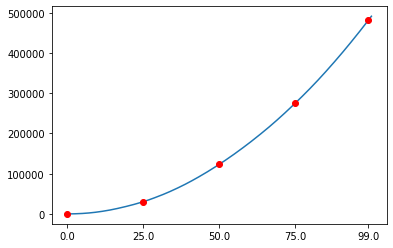

In [0]:
%matplotlib inline
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np

d = np.sort(np.random.randint(0,1000,1000)).cumsum()

# Percentile values
p = np.array([0.0, 25.0, 50.0, 75.0, 99.0])

perc =  [np.percentile(d, prob) for prob in p]

plt.plot(d)
# Place red dots on the percentiles
plt.plot((len(d)-1) * p/100., perc, 'ro')

# Set tick locations and labels
plt.xticks((len(d)-1) * p/100., map(str, p))

plt.show()

# Percentis na prática


Começaremos gerando alguns dados aleatórios com a distribuição normal. No exemplo geraremos dados centrados ao redor de zero, com uma média zero e um desvio padrão de 0.5 com 10000 pontos.

Vamos plotar um histograma e ver como ela é.



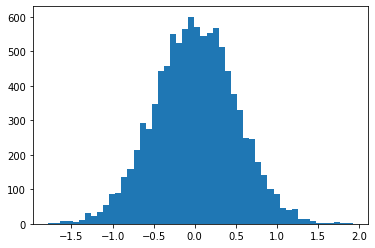

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 0.5, 10000)
  
plt.hist(vals, 50)
plt.show()

Para computar os percentis desta distribuição, o numpy provê uma função chamada percentile que já nos dá o resultado.

Com os nossos dados salvos na variável vals, bastam chamar a função percentile nos dados

In [0]:
np.percentile(vals, 50)

-0.01113641119752193

Lembre-se que o percentil de 50% é só outro nome para a mediana, que é aproximada de zero nesse conjunto de dados.

In [0]:
np.percentile(vals,90)

0.6512176417825041

In [0]:
np.percentile(vals,20)

-0.44420807468294277

# Exercício

Tente mexer na distribuição  de dados, que efeito tem um desvio padrão diferente? E se mudarmos a quantidade de dados que criamos, o quanto isso influencia nossa distribuição?

# Momentos (Esperança)

É uma maneira quantitativa de medir o formato de uma função densidade de probabilidade.

Matematicamente, a esperança é dada por:

$\mu_n = \int_{-\infty}^{\infty} (x-c)^n f(x) dx$ para a esperança n ao redor do valor c

Completamente fácil de entender e implementar, correto?

Por mais que pareça difícil o conceito de momentos, veremos que na prática eles são mais fácil do que a fórmula matemática diz

## 1º Momento

O primeiro momento é conhecido por média, ele nos dá a média do conjunto de dados que estamos trabalhando

## 2º Momento

O segundo momento nos dá a variância de um conjunto de dados.

## 3º Momento

O terceiro momento é chamado de assimetria ou skewness, que mede o grau de distorção de uma curva em relação a curva normal. Ele mede a falta de simetria na distribuição de dados e diferencia valores extremos em uma cauda versus na
outra.

Uma distribuição normal terá assimetria zero 

![Assimetria](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/434px-Relationship_between_mean_and_median_under_different_skewness.png)

## 4º Momento
O quarto momento é chamado de kurtosis ou curtose, ela é uma medida de dispersão que caracteriza o "achatamento" da curva da função de distribuição.

Temos basicamente três tipos de curtose:

- mesócurticas(0):
  - achatamento da distribuição normal;
- leptocúrtica(> 0): 
  - possui a curva da função de distribuição mais
afunilada
  - pico mais alto do que a distribuição normal
  - possui caudas pesadas.
- platicúrtica (<0):
  - função de distribuição é mais achatada do que a
distribuição normal . 

![Kurtose](https://www.bogleheads.org/w/images/thumb/c/c0/Kurtosis1.jpg/250px-Kurtosis1.jpg)

# Prática



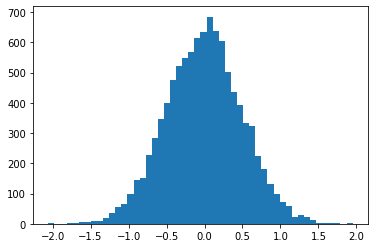

In [12]:
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0,0.5,10000)
plt.hist(vals,50)
plt.show()

O primeiro momento é a média, que deve estar perto de 0

In [13]:
np.mean(vals)

-0.00885856113655061

O segundo momento é a variância


In [14]:
np.var(vals)

0.24782988840076559

O terceiro momento é a assimetria, já que nossos dados estão centrados ao redor de zero, a assimetria deveria ser nula

In [5]:
import scipy.stats as sp
sp.skew(vals)

-0.026957905456555145

O quarto momento é a curtose, que nos dá a dispersão. Para uma distribuição normal ela deveria ser zero.

In [15]:
sp.kurtosis(vals)

0.02293577071936337

# Exercício

Aplique os momentos em outras funções densidade, que diferença de valores você espera ter? (Dica: np.random tem várias distribuições, tente a exponencial,t-student,etc)


Se a distribuição for centrada ao redor de 10, quais momentos ela mais afetará? Terá algum momento que não será afetado?

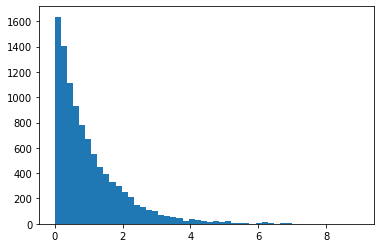

In [10]:
vals = np.random.exponential(1,10000)
plt.hist(vals,50)
plt.show()